<a href="https://colab.research.google.com/github/Likitha110/AflidoTech/blob/main/Iris_Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"likithakyama","key":"15c0f788e05291978ca615ad6e6d7c8b"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d arshid/iris-flower-dataset

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 2.20MB/s]


In [5]:
!unzip /content/iris-flower-dataset.zip

Archive:  /content/iris-flower-dataset.zip
  inflating: IRIS.csv                


**Data Preprocessing**


In [6]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [7]:
iris_data=pd.read_csv("/content/IRIS.csv")

In [8]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris_data["species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
iris_data['species']=iris_data['species'].apply(str).str.replace('Iris-','')

In [13]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
iris_data['species']=iris_data['species'].apply(str).str.replace('setosa','0')

In [15]:
iris_data['species']=iris_data['species'].apply(str).str.replace('versicolor','1')

In [16]:
iris_data['species']=iris_data['species'].apply(str).str.replace('virginica','2')

In [17]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
iris_data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [19]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Data Visualization**

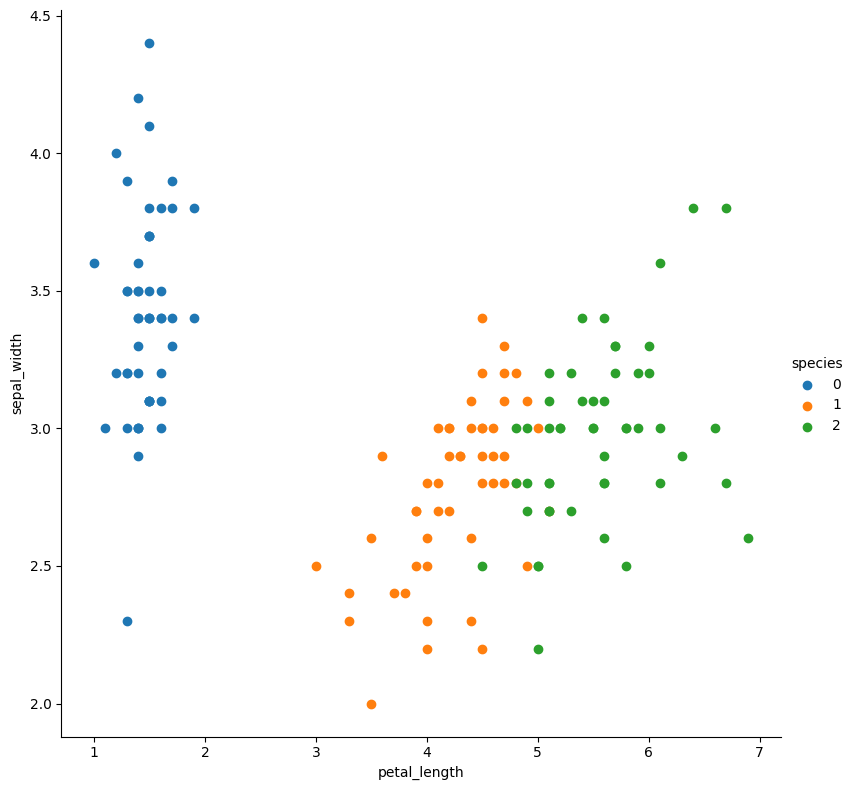

In [20]:
sns.FacetGrid(iris_data,hue='species',height=8).map(plt.scatter,"petal_length","sepal_width").add_legend()

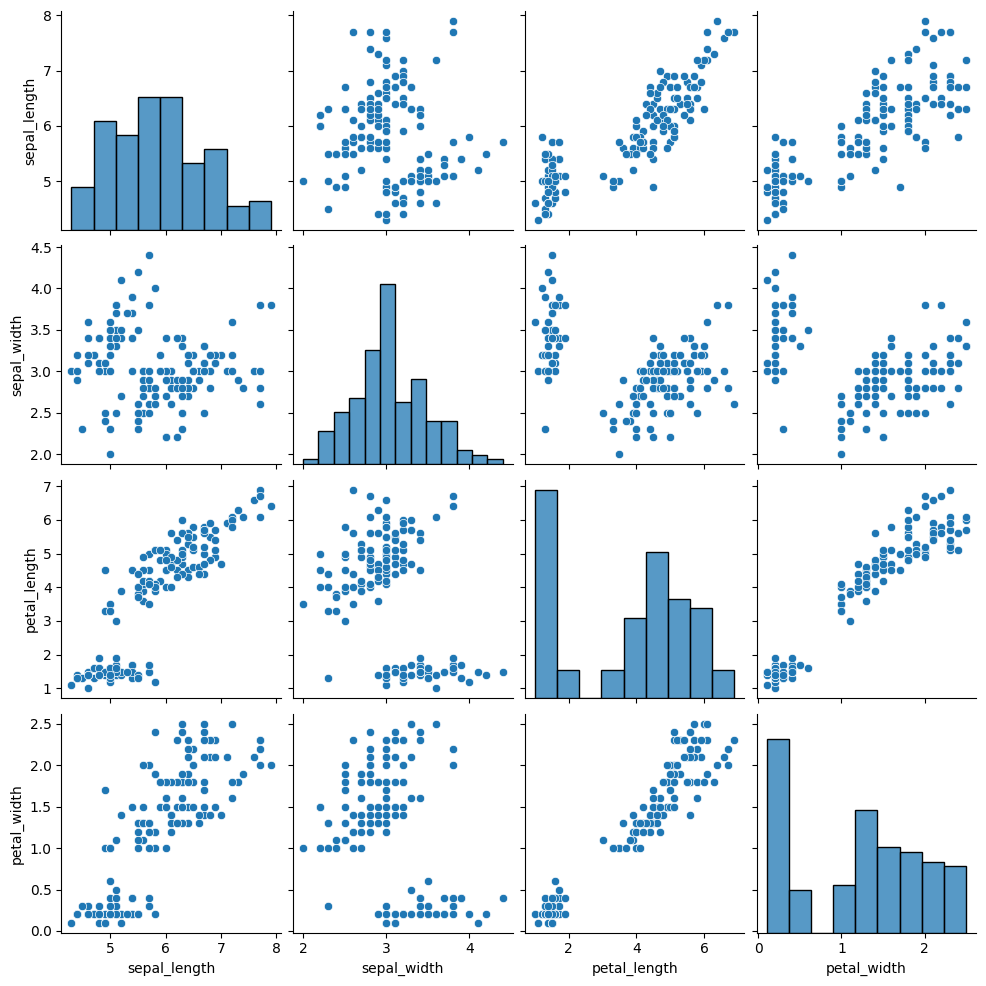

In [21]:
sns.pairplot(iris_data)

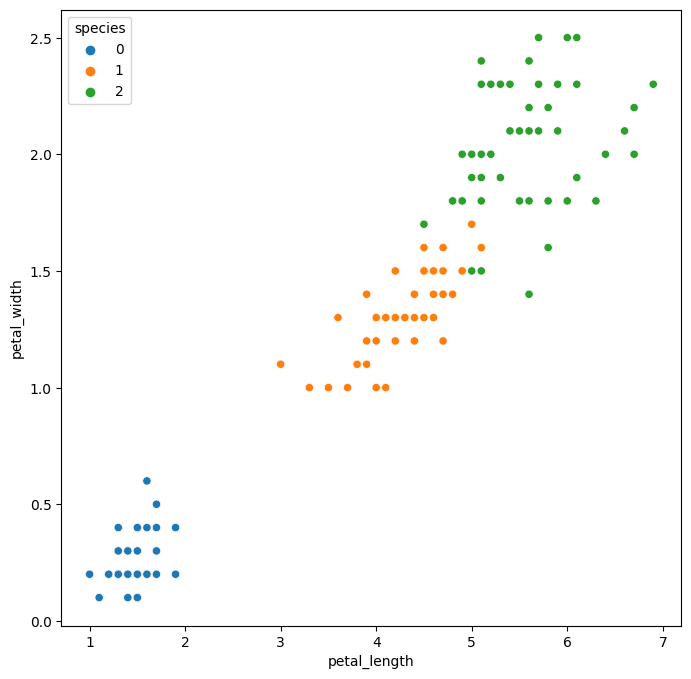

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="petal_length", y="petal_width", data=iris_data, hue="species")
plt.show()

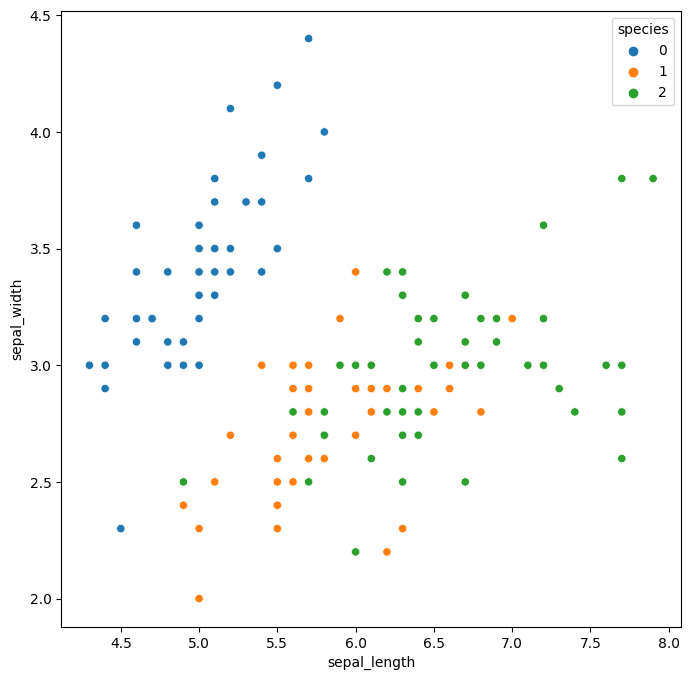

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_data, hue="species")
plt.show()

In [25]:
x=iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y=iris_data[['species']].values

**Model selection**

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_predict=logmodel.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

**DecisionTree Classifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
predictions=decision_tree.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

**KNeighbors Classifier**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
predictions=knn_model.predict(x_test)

In [42]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

**Support vector classifier**

In [45]:
from sklearn.svm import SVC

In [48]:
svm_model=SVC()
svm_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [49]:
predictions=svm_model.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0